In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def display_img(img):
    fig=plt.figure(figsize=(12,8))
    ax=fig.add_subplot(111)
    ax.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()
    plt.close()

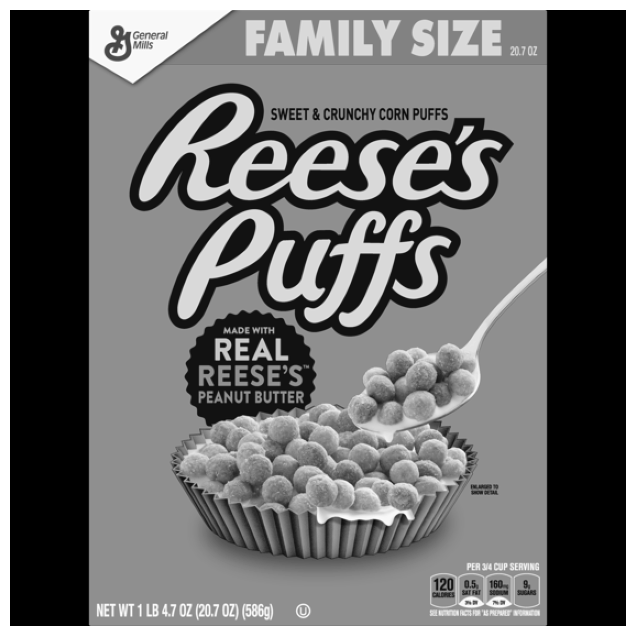

In [3]:
reeses_puff_img_gray = cv2.imread('Data/reeses_puffs.png', 0)

display_img(reeses_puff_img_gray)

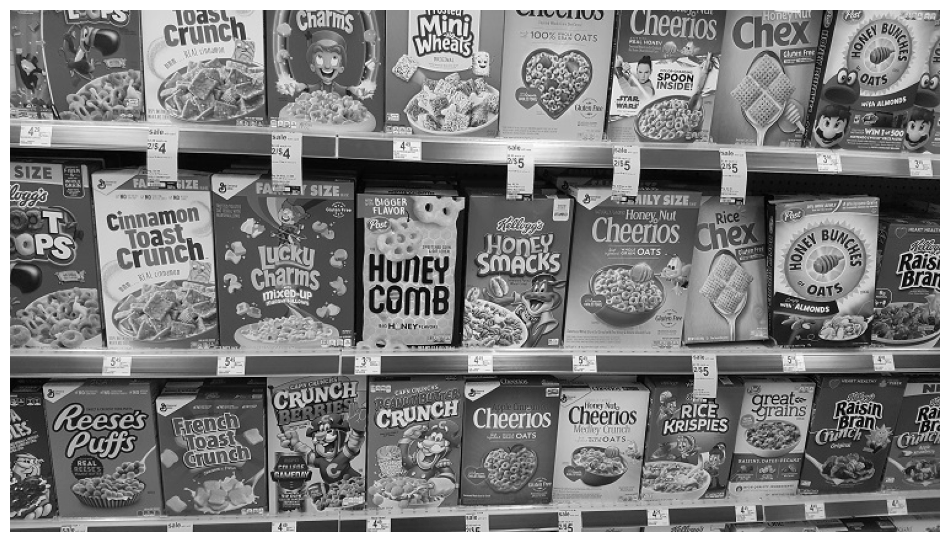

In [4]:
cereals_img_gray = cv2.imread('Data/many_cereals.jpg', 0)

display_img(cereals_img_gray)

## FEATURE MATCHING:

### BRUTE FORCE DETECTION WITH ORB DESCRIPTORS:

In [7]:
#extracts defining key featurees from an input image.
#using corner, edge, contour detection

#but template matching - exact same object in image

#creating a detector
orb_detector_fetmpg = cv2.ORB_create()


In [8]:
#keypoints and descriptors for this detector object
kp_rp, desc_rp = orb_detector_fetmpg.detectAndCompute(reeses_puff_img_gray, None)
kp_cr, desc_cr = orb_detector_fetmpg.detectAndCompute(cereals_img_gray, None)

In [9]:
kp_rp

(< cv2.KeyPoint 0x1229ee3a0>,
 < cv2.KeyPoint 0x122b46a30>,
 < cv2.KeyPoint 0x123916c70>,
 < cv2.KeyPoint 0x123916460>,
 < cv2.KeyPoint 0x123917420>,
 < cv2.KeyPoint 0x122bf8630>,
 < cv2.KeyPoint 0x122bf8960>,
 < cv2.KeyPoint 0x122bf8090>,
 < cv2.KeyPoint 0x122b605d0>,
 < cv2.KeyPoint 0x122b60ab0>,
 < cv2.KeyPoint 0x122b60de0>,
 < cv2.KeyPoint 0x122b605a0>,
 < cv2.KeyPoint 0x122b60d20>,
 < cv2.KeyPoint 0x122b60870>,
 < cv2.KeyPoint 0x122b608a0>,
 < cv2.KeyPoint 0x122b60db0>,
 < cv2.KeyPoint 0x122b60b10>,
 < cv2.KeyPoint 0x122b60e10>,
 < cv2.KeyPoint 0x122b60780>,
 < cv2.KeyPoint 0x122b60c90>,
 < cv2.KeyPoint 0x122b60720>,
 < cv2.KeyPoint 0x122b608d0>,
 < cv2.KeyPoint 0x122b60900>,
 < cv2.KeyPoint 0x122b60930>,
 < cv2.KeyPoint 0x122b60960>,
 < cv2.KeyPoint 0x122b63c60>,
 < cv2.KeyPoint 0x122b63cf0>,
 < cv2.KeyPoint 0x122b63c90>,
 < cv2.KeyPoint 0x122b63cc0>,
 < cv2.KeyPoint 0x122b63d20>,
 < cv2.KeyPoint 0x122b63d50>,
 < cv2.KeyPoint 0x122b639c0>,
 < cv2.KeyPoint 0x122b63450>,
 < cv2.Key

In [10]:
kp_cr

(< cv2.KeyPoint 0x1230d9560>,
 < cv2.KeyPoint 0x1230d9590>,
 < cv2.KeyPoint 0x1230d95c0>,
 < cv2.KeyPoint 0x1230d95f0>,
 < cv2.KeyPoint 0x1230d9620>,
 < cv2.KeyPoint 0x1230d9650>,
 < cv2.KeyPoint 0x1230d9680>,
 < cv2.KeyPoint 0x1230d96b0>,
 < cv2.KeyPoint 0x1230d96e0>,
 < cv2.KeyPoint 0x1230d9710>,
 < cv2.KeyPoint 0x1230d9740>,
 < cv2.KeyPoint 0x1230d9770>,
 < cv2.KeyPoint 0x1230d97a0>,
 < cv2.KeyPoint 0x1230d97d0>,
 < cv2.KeyPoint 0x1230d9800>,
 < cv2.KeyPoint 0x1230d9830>,
 < cv2.KeyPoint 0x1230d9860>,
 < cv2.KeyPoint 0x1230d9890>,
 < cv2.KeyPoint 0x1230d98c0>,
 < cv2.KeyPoint 0x1230d98f0>,
 < cv2.KeyPoint 0x1230d9920>,
 < cv2.KeyPoint 0x1230d9950>,
 < cv2.KeyPoint 0x1230d9980>,
 < cv2.KeyPoint 0x1230d99b0>,
 < cv2.KeyPoint 0x1230d99e0>,
 < cv2.KeyPoint 0x1230d9a10>,
 < cv2.KeyPoint 0x1230d9a40>,
 < cv2.KeyPoint 0x1230d9a70>,
 < cv2.KeyPoint 0x1230d9aa0>,
 < cv2.KeyPoint 0x1230d9ad0>,
 < cv2.KeyPoint 0x1230d9b00>,
 < cv2.KeyPoint 0x1230d9b30>,
 < cv2.KeyPoint 0x1230d9b60>,
 < cv2.Key

In [11]:
desc_rp

array([[  9, 219, 135, ..., 134,  33, 121],
       [  0, 140,  29, ...,   8, 148, 170],
       [ 17,  39, 107, ...,  10,  83, 224],
       ...,
       [ 40, 153, 252, ..., 235,  72, 154],
       [ 40, 150, 112, ..., 142, 198, 210],
       [ 90, 162,  53, ...,   6,  45,  72]], dtype=uint8)

In [12]:
desc_cr

array([[122, 178, 149, ...,  40,  86, 163],
       [128,  20, 180, ...,  88, 209,  46],
       [184,  65, 114, ..., 174, 124,   2],
       ...,
       [ 89, 144, 237, ..., 128,  68, 120],
       [ 45,  37,  80, ..., 139,  90, 129],
       [243,   1,  39, ...,   4, 166, 118]], dtype=uint8)

In [13]:
desc_rp.shape

(500, 32)

In [14]:
desc_cr.shape

(500, 32)

In [16]:
type(kp_cr)

tuple

In [17]:
#now using brute force with orb detectors

#now creating a matching object using bf 

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)


In [18]:
bf

< cv2.BFMatcher 0x122f10290>

In [19]:
#now using bf with orb detectors object to find the matches b/w two images

matches = bf.match(desc_rp, desc_cr)

In [20]:
matches

(< cv2.DMatch 0x10fc22750>,
 < cv2.DMatch 0x122f10a90>,
 < cv2.DMatch 0x122f12dd0>,
 < cv2.DMatch 0x122f10050>,
 < cv2.DMatch 0x122f10030>,
 < cv2.DMatch 0x122f10070>,
 < cv2.DMatch 0x122f100f0>,
 < cv2.DMatch 0x122f10990>,
 < cv2.DMatch 0x122f10950>,
 < cv2.DMatch 0x12391cab0>,
 < cv2.DMatch 0x12391c9b0>,
 < cv2.DMatch 0x12391c590>,
 < cv2.DMatch 0x12391d370>,
 < cv2.DMatch 0x12391c5b0>,
 < cv2.DMatch 0x12391c7b0>,
 < cv2.DMatch 0x12391d3d0>,
 < cv2.DMatch 0x10ef74110>,
 < cv2.DMatch 0x122987910>,
 < cv2.DMatch 0x122987750>,
 < cv2.DMatch 0x122987730>,
 < cv2.DMatch 0x122987950>,
 < cv2.DMatch 0x122987870>,
 < cv2.DMatch 0x122987770>,
 < cv2.DMatch 0x1228744b0>,
 < cv2.DMatch 0x122874490>,
 < cv2.DMatch 0x122874a70>,
 < cv2.DMatch 0x122876ab0>,
 < cv2.DMatch 0x122877390>,
 < cv2.DMatch 0x1228779d0>,
 < cv2.DMatch 0x122874150>,
 < cv2.DMatch 0x122874290>,
 < cv2.DMatch 0x122876930>,
 < cv2.DMatch 0x122876290>,
 < cv2.DMatch 0x1229e76f0>,
 < cv2.DMatch 0x1229e76d0>,
 < cv2.DMatch 0x1229

In [22]:
len(matches)

138

In [23]:
#sorting these matches in order of distance - to get top matches (similar kind)
#ecah of match has a distance attribute

matches_smlr = sorted(matches, key=lambda x:x.distance)

In [24]:
matches_smlr

[< cv2.DMatch 0x1229e7bd0>,
 < cv2.DMatch 0x1229e7d10>,
 < cv2.DMatch 0x12391c9b0>,
 < cv2.DMatch 0x1229e7c10>,
 < cv2.DMatch 0x1229e7810>,
 < cv2.DMatch 0x1229e7cb0>,
 < cv2.DMatch 0x1229e7ed0>,
 < cv2.DMatch 0x1229e7af0>,
 < cv2.DMatch 0x1229e7bb0>,
 < cv2.DMatch 0x122f10030>,
 < cv2.DMatch 0x1229e7fb0>,
 < cv2.DMatch 0x1229e7870>,
 < cv2.DMatch 0x12391c590>,
 < cv2.DMatch 0x12391c5b0>,
 < cv2.DMatch 0x122987770>,
 < cv2.DMatch 0x1229e79d0>,
 < cv2.DMatch 0x1229e7e10>,
 < cv2.DMatch 0x12391d3d0>,
 < cv2.DMatch 0x1228744b0>,
 < cv2.DMatch 0x1229e7b50>,
 < cv2.DMatch 0x122f10070>,
 < cv2.DMatch 0x1229e7ef0>,
 < cv2.DMatch 0x1229e7e90>,
 < cv2.DMatch 0x1229e7cf0>,
 < cv2.DMatch 0x1227f77f0>,
 < cv2.DMatch 0x10fc22750>,
 < cv2.DMatch 0x1229e7a70>,
 < cv2.DMatch 0x1229e7ad0>,
 < cv2.DMatch 0x1229e7d90>,
 < cv2.DMatch 0x12391d370>,
 < cv2.DMatch 0x122876290>,
 < cv2.DMatch 0x1229e7e50>,
 < cv2.DMatch 0x1229e7850>,
 < cv2.DMatch 0x122987730>,
 < cv2.DMatch 0x1227f7d30>,
 < cv2.DMatch 0x1227

In [25]:
len(matches_smlr)

138

In [26]:
#drawing these all matches using both images and top 30 matches

reeses_matches = cv2.drawMatches(reeses_puff_img_gray, kp_rp, cereals_img_gray, kp_rp, matches[:30], None, flags=2)



In [27]:
reeses_matches

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [129, 129, 129],
        [116, 116, 116],
        [ 48,  48,  48]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [112, 112, 112],
        [116, 116, 116],
        [ 47,  47,  47]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [102, 102, 102],
        [ 97,  97,  97],
        [ 70,  70,  70]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [28]:
reeses_matches.shape

(560, 1317, 3)

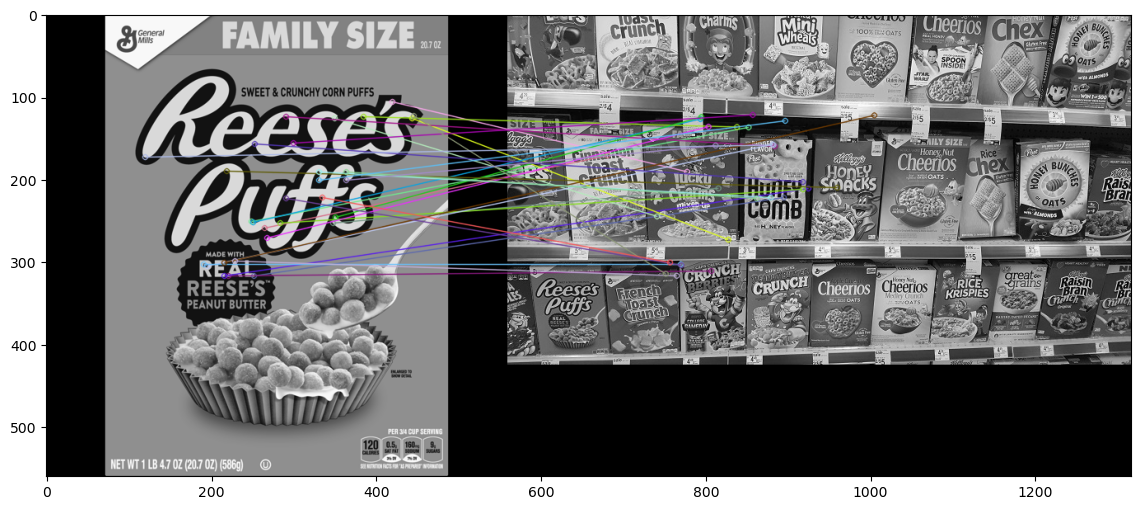

In [32]:
fig = plt.figure(figsize=(14,9))
plt.imshow(reeses_matches)
plt.show()
plt.close()

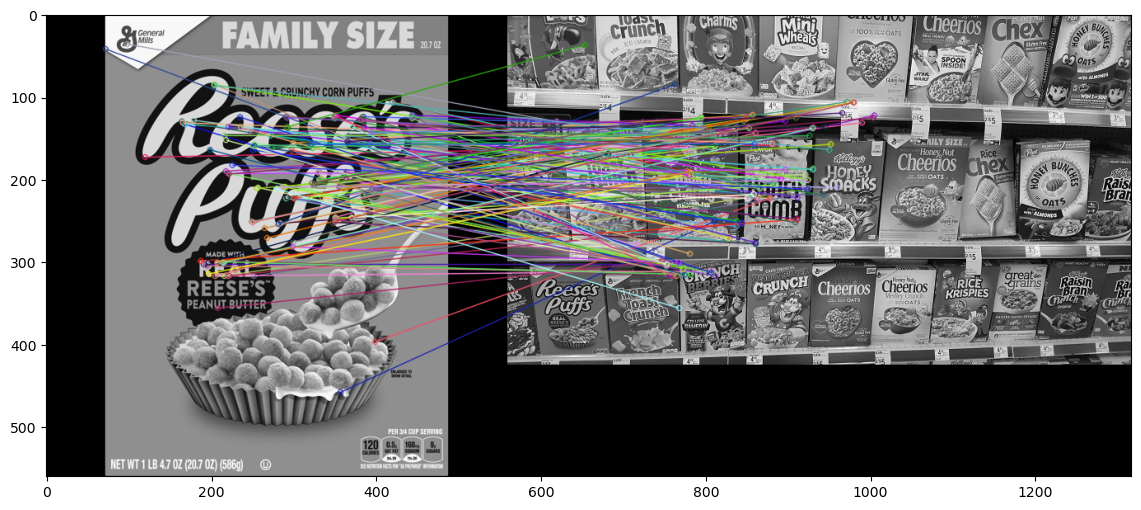

In [33]:
#can see clearly the top match doesn't have the matching


reeses_matches_all = cv2.drawMatches(reeses_puff_img_gray, kp_rp, cereals_img_gray, kp_rp, matches, None, flags=2)

fig = plt.figure(figsize=(14,9))
plt.imshow(reeses_matches_all)
plt.show()
plt.close()

In [34]:
#no match detected the object

#this is bcs of confusion that family size is creating it is thinking of other object